In [4]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [1]:
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import pandas as pd

In [6]:
df = pd.read_csv('data.csv', encoding='utf-8')
df.head()

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0


In [10]:
df.rename(columns={'conversion': 'target', 'offer': 'treatment'}, inplace=True)

In [11]:
df['treatment'].replace(to_replace={'No Offer': 0, 'Buy One Get One': 1, 'Discount': 1}, inplace=True)

In [12]:
index_train, index_valid = train_test_split(df.index, test_size=0.3, random_state=43)
index_train.shape, index_valid.shape

((44800,), (19200,))

In [13]:
X_train = df.loc[index_train, :].drop(['target', 'treatment'], 1)
y_train = df.loc[index_train, 'target']
treat_train = df.loc[index_train, 'treatment']

X_valid = df.loc[index_valid, :].drop(['target', 'treatment'], 1)
y_valid = df.loc[index_valid, 'target']
treat_valid = df.loc[index_valid, 'treatment']

print(X_train.shape, y_train.shape, treat_train.shape)
print(X_valid.shape, y_valid.shape, treat_valid.shape)

(44800, 7) (44800,) (44800,)
(19200, 7) (19200,) (19200,)


In [15]:
cat_features = [col for col in df.columns if df[col].dtype == 'object']

In [16]:
X_train_tree = pd.concat([X_train.drop(cat_features, 1), 
                          pd.get_dummies(X_train[cat_features], prefix=cat_features)], 1)

In [17]:
X_valid_tree = pd.concat([X_valid.drop(cat_features, 1), 
                          pd.get_dummies(X_valid[cat_features], prefix=cat_features)], 1)

In [18]:
uplift_model = UpliftTreeClassifier(max_depth=3, min_samples_leaf=400, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

In [20]:
features = [col for col in X_train_tree]

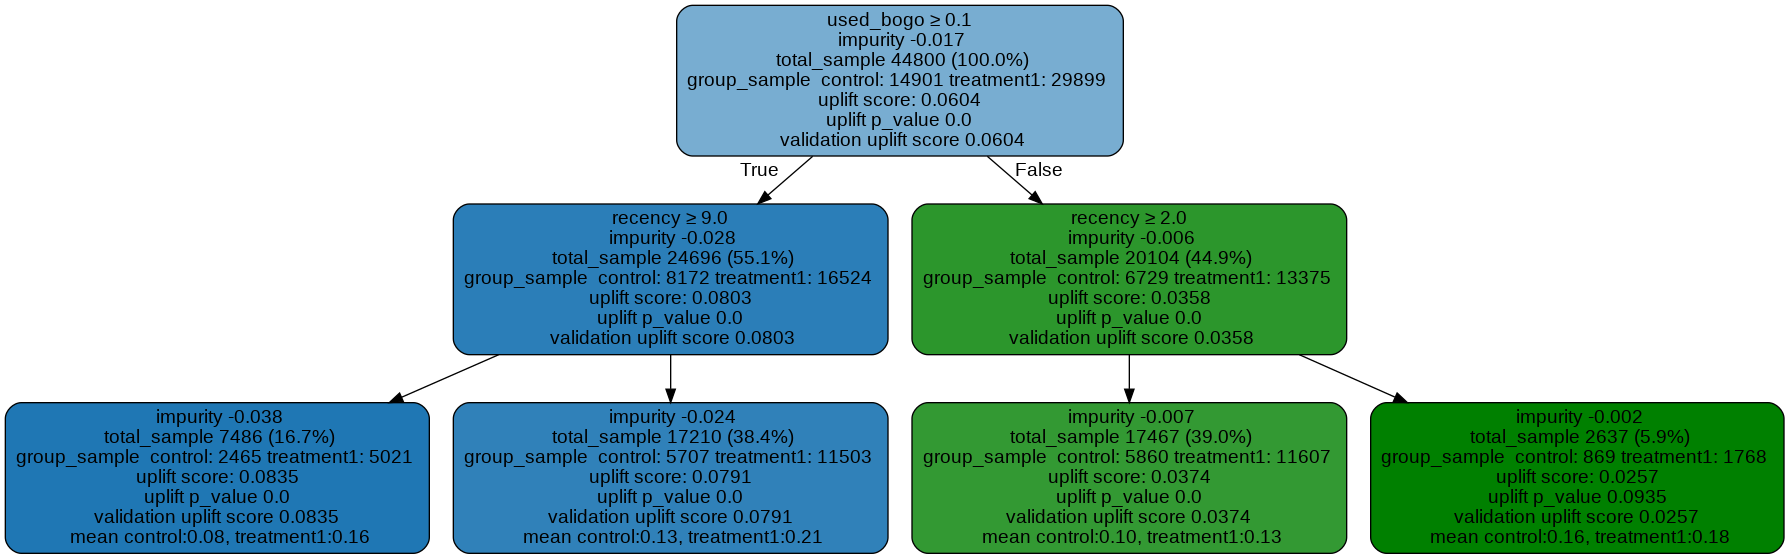

In [21]:
graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
Image(graph.create_png())

In [ ]:
В первом листе слева p-value меньше 0.05 и наибольший скор.
Содержательно это интерпретировать невозможно, посольку не понятно содержание переменных. 
В целом, этот новый признак выглядел бы так: used_bogo >= 0.1 and recency >=9